## TASK 1: PREDICT THE AGE OF A BRAIN FROM MRI FEATURES

This task is primarily concerned with regression. However, we have perturbed the original MRI features in several ways. You will need to perform outlier detection, feature selection, and other preprocessing to achieve the best result.

#### Data Description
The data for this task contains the following files:

X_train.csv - the training features 

y_train.csv - the training targets 

X_test.csv - the test features (you need to make predictions for these samples)

sample.csv - a sample submission file in the correct format

Each row in X_train.csv is one sample indexed by an id, so the first column contains the id. In addition to the id column, each sample has 833 features

# Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as modsel
from sklearn import preprocessing
import sklearn.linear_model as lm
from sklearn.metrics import r2_score
%matplotlib inline

# load data
X_validation_data = pd.read_csv("X_test.csv")
# sample = pd.read_csv("sample.csv")
X_data = pd.read_csv("X_train.csv")
y_data = pd.read_csv("y_train.csv")

In [2]:
# drop low-variance features
#ix_drop=np.argwhere(X_data.std() < 1)
#ix_drop= ix_drop.flatten().tolist()
#X_validation_data = X_validation_data.drop(X_validation_data.columns[ix_drop], axis=1)
#X_data = X_data.drop(X_data.columns[ix_drop], axis=1)

# drop high-variance features
#ix_drop=np.argwhere(X_data.std() > 10000)
#ix_drop= ix_drop.flatten().tolist()
#X_validation_data = X_validation_data.drop(X_validation_data.columns[ix_drop], axis=1)
#X_data = X_data.drop(X_data.columns[ix_drop], axis=1)

X_validation_data = X_validation_data.drop(['x169','x283','x367','x777'],axis =1) # delete "0"-columns
X_validation_data.head()

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,0.0,116890.145646,4682.826460,102084.432558,988.163180,10412.331659,10.481227,103604.878991,1.095767e+06,100602.794631,...,11.027043,11.009213,1030.608247,1018.364228,108762.467652,105073.764746,7347.221554,8.598623,102506.589322,2.350805
1,1.0,104149.957877,3161.012055,93566.104799,1037.879907,11232.156777,10.143346,NaN,1.083111e+06,102331.038815,...,NaN,10.391822,1049.620654,972.516069,108773.164038,105822.141259,5687.349133,9.791258,107449.718830,2.278208
2,2.0,91332.402246,3922.735224,108810.999713,1008.536233,12030.362103,10.811671,107372.736023,1.075590e+06,104247.270565,...,10.648721,10.979466,973.772111,1068.819601,106851.090304,104651.998344,6510.915424,10.993281,107366.747806,2.171415
3,3.0,93281.714961,3707.283134,86947.473251,947.048927,10037.466655,10.208015,NaN,1.042872e+06,103283.424614,...,10.255209,10.566875,918.617516,NaN,104245.538474,102301.224747,NaN,9.845355,100865.094552,2.222927
4,4.0,88434.057156,5184.106152,85396.992336,1101.076469,10083.474388,10.124108,109507.125721,1.013667e+06,102676.240326,...,10.482693,10.784100,945.230640,1032.396697,106180.279333,104253.493703,6586.500123,11.953965,101665.694524,2.057716


In [3]:
X_data = X_data.drop(['x169','x283','x367','x777'],axis =1)
X_data.head()

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,0.0,118345.392781,3104.010883,82378.542430,1086.678601,11395.883550,10.455601,109886.476608,1.054926e+06,101877.946528,...,10.769524,10.245068,1021.907543,1031.645762,107440.039766,107083.296966,5559.203921,10.861464,107548.413675,2.299202
1,1.0,NaN,5889.055991,97932.067482,1116.564363,12172.212426,10.502997,100372.504488,1.011783e+06,108852.296962,...,10.859822,10.088023,988.135968,999.044639,105238.779040,106365.468525,10334.091649,NaN,107841.227180,2.472763
2,2.0,95373.022035,6293.442455,93371.369288,1034.722073,11618.142107,10.947611,109337.757279,1.006491e+06,104540.883376,...,10.356015,10.514234,995.480813,898.329758,107044.005199,102704.104686,7697.875887,10.277760,103414.594212,NaN
3,3.0,105066.272301,3279.162164,119554.079514,1114.014483,12127.235755,10.540204,106215.391332,1.022381e+06,109597.474506,...,10.609811,10.991861,1117.179063,867.267810,100617.082858,108893.304959,6549.131099,9.337688,105722.857008,2.484935
4,4.0,98957.033333,4177.482190,97239.708338,1049.430921,10417.250336,10.618957,102736.470171,1.086871e+06,103340.057448,...,10.397777,NaN,863.943966,1041.278922,105352.672454,101705.692839,5388.312773,12.196382,NaN,1.930136


# Functions 

In [4]:
# pre processing
def pre_processing(X_data, robust=False, ix=None): 
    """
    standardize X and y, returns DataFrame
    """
    Xs = X_data.fillna(X_data.median())
    
    if robust == True:
        scaler = preprocessing.RobustScaler().fit(Xs)
    else:
        scaler = preprocessing.StandardScaler().fit(Xs)
    
    Xs = scaler.transform(Xs)
    Xs = pd.DataFrame(data=Xs, columns=X_data.columns)
    Xs = Xs.drop("id", 1)
    
    if ix:
        Xs = Xs.iloc[:, ix]     
    
    return Xs
   
# plot feature selection
from sklearn.feature_selection import RFECV # recursive feature elimination and cv selection of best number of features
def plot_features(selector):
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
    plt.show()
    
# save result  ( ---> change to YOUR folder path)
def export_result(y_pred, name_appendix= ""):
    y_pred = pd.DataFrame(y_pred)
    y_pred.reset_index(level=0, inplace=True)
    y_pred.columns = ['id', 'y']
    export_to_csv = y_pred.to_csv("y_pred" + ".csv",index=False )

def savetofile(f_name, res):
    # f_name='result'
    f_n_append = str(round(time.time()))
    file_name = f_name + f_n_append[-4:] +'.csv'
    print(file_name)
    export=pd.DataFrame({'id':np.arange(0,len(res),1),'y':res})
    export.to_csv(file_name, index=False)

# Pre-process data

In [5]:
X = pre_processing(X_data, robust=False)
X_validation = pre_processing(X_validation_data, robust=False)
y = y_data.y

# Feature Selection (via Recursive Feature Elimination & Ridge Regression)

Optimal number of features : 30


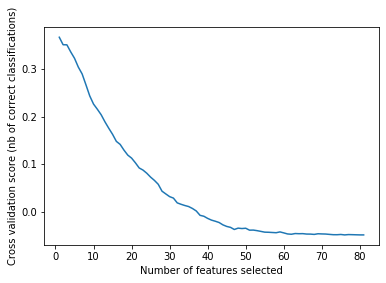

In [6]:
# new version: via Ridge Regression
ridge = lm.Ridge(alpha=100)
selector = RFECV(ridge, step=10, min_features_to_select = 30, scoring='r2', cv=10)
selector = selector.fit(X,y)

print("Optimal number of features : %d" % np.sum(selector.ranking_ == 1))
plot_features(selector)

ix_RFE = selector.ranking_ == 1

# Cross Validation

In [7]:
reg = lm.LinearRegression()
cv_results = modsel.cross_validate(reg, X.iloc[:,ix_RFE], y, cv=10, return_estimator=True,
                                   return_train_score=True)
print("Setting: LinReg, CV \n","R2_score: %0.2f (+/- %0.2f)" % 
      (cv_results['test_score'].mean(), cv_results['test_score'].std() * 2))

Setting: LinReg, CV 
 R2_score: 0.43 (+/- 0.21)


In [8]:
from sklearn import svm
svr = svm.SVR(gamma='auto')
scores = modsel.cross_val_score(svr, X.iloc[:,ix_RFE], y, cv=10, scoring='r2')
print("Setting: SVR, CV \n","R2_score: %0.2f (+/- %0.2f)" % (scores.mean(),
                                              scores.std() * 2))

Setting: SVR, CV 
 R2_score: 0.48 (+/- 0.11)


# Model of choice: SVR
## Step 1: find good value for tuning parameter C

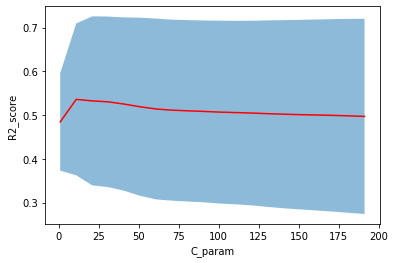

Optimal C-Value =  11


In [9]:
score_mean = []
score_conf = []

# setting C parameter for SVR
C_parameter = np.arange(1,201,10)
for i in C_parameter:
    svr = svm.SVR(C=i, kernel='rbf', gamma='scale')
    scores = modsel.cross_val_score(svr, X.iloc[:,ix_RFE], y, cv=10, scoring='r2')
    score_mean.append(scores.mean())
    score_conf.append(scores.std() * 2)

plt.plot(C_parameter, score_mean, 'r-')
plt.fill_between(C_parameter, np.subtract(score_mean,score_conf), 
                 np.add(score_mean,score_conf), alpha=.5)
plt.xlabel("C_param")
plt.ylabel("R2_score")
plt.show()

print("Optimal C-Value = ", C_parameter[np.argmax(score_mean)])
c_val = C_parameter[np.argmax(score_mean)]

## Step 2: Using tuning parameter (c_val), find a good test / train split!

In [10]:
# find a good parametrization
score = []
for i in np.arange(0,1000):
    X_train, X_test, y_train, y_test = modsel.train_test_split(X.iloc[:,ix_RFE], y, test_size=0.1, 
                                                        random_state=i)
    svr = svm.SVR(C=c_val, gamma='auto')
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    #print("i=", i, "/ score is: " , r2_score(y_test, y_pred) )
    score.append(r2_score(y_test, y_pred))

print("best score is: ", max(score), " at random state i = " , np.argmax(score))
i_state = np.argmax(score)

best score is:  0.7201843288674303  at random state i =  473


## Step 3: Use the best test/train split to train the final model. Take this model to fit the "real" test data (called X_validation)

In [11]:
X_train, X_test, y_train, y_test = modsel.train_test_split(X.iloc[:,ix_RFE], y, test_size=0.1, 
                                                        random_state=i_state)
# svr = svm.SVR(C=c_val, gamma='auto')
svr = svm.SVR(C=c_val, kernel='rbf', gamma='scale')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
r2_score(y_test, y_pred)
import time
y_predt = svr.predict(X_validation.iloc[:,ix_RFE])
# export_result(y_pred, "_svr")
savetofile('res',y_predt)
# res8416.csv 0.65920431084 public score

res8416.csv


In [12]:
print("# res8416.csv 0.65920431084 public score")

# res8416.csv 0.65920431084 public score
